<a href="https://colab.research.google.com/github/KGrzegorzewski/MachineLearning/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [0]:
cd '/content/drive/My Drive/Tech_With_Tim/'

/content/drive/My Drive/Tech_With_Tim


In [0]:
#Pobranie danych
data = pd.read_csv("student-mat.csv", sep = ";")
print(data.head())
#Wybieram tylko interesujące mnie dane
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
print(data.head())

  school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]
   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


In [0]:
#To zamierzam przewidzieć
predict = "G3"

In [0]:
#Wyrzucam "G3" z danych i tworze np.array
X = np.array(data.drop([predict], 1))
#Tworzę tablice z wartościami, które mają być przewidywane
y = np.array(data[predict])

In [0]:
#Petla do sprawdzenia najlepszej opcji modelu liniowej regresji dla 30 iteracji, 30 róznych danych testowych wygenerowanych przez sklearn
best = 0
for _ in range(30): 
  #Stworzzenie danych testowych oraz trenujących poprzez modul sklearn, dane testujące bedą stanowić 10% całego zbioru danych
  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

  #Stworzenie modelu oraz wytrenowanie na danych treningowych, wypisanie dokładności
  linear = linear_model.LinearRegression()
  linear.fit(x_train, y_train)
  acc = linear.score(x_test, y_test)
  print(acc)

  if(acc > best):
    best = acc
    #Data aquisition
    with open("studentmodel.pickle", "wb") as f:
      pickle.dump(linear, f)

0.836206462707483
0.8227066326055339
0.7600949845496422
0.8704326813497012
0.7898017398568811
0.940282537537685
0.7103022282027867
0.7184790299028287
0.7658581341311473
0.8222762613805948
0.6331829441127756
0.7737138912052526
0.9484541144786925
0.9005067914704276
0.7979387622165595
0.7208014587476737
0.888171853731886
0.7993983722623124
0.9045885039545972
0.8879892137699206
0.8110462478922178
0.5223514239242913
0.8847706297000199
0.7282975025110241
0.8657934792188088
0.7831830522047042
0.7519243586656672
0.8380464521381767
0.8608664278686301
0.79428582653452


In [0]:
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [0]:
#Parametry liniowej regresji
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
print("Co: \n", linear.coef_)
print("Intercept: \n", linear.intercept_)

Co: 
 [ 0.15591873  0.99428878 -0.24636515 -0.2282284   0.0372726 ]
Intercept: 
 -1.6104835420620809


In [0]:
#Sprawdzmy jak wyglada predykcja oraz faktyczna wartość oceny
predictions = linear.predict(x_test)
for x in range(len(predictions)):
  print(predictions[x], x_test[x], y_test[x])

4.865748128492973 [5 6 2 0 6] 6
7.392157663553252 [5 9 2 2 6] 7
17.294395156097494 [16 17  2  0  0] 17
7.265673433555532 [8 8 1 1 4] 8
4.343695671720654 [ 6  5  1  1 14] 5
5.103040388062619 [7 6 2 0 4] 6
3.952832873946779 [6 5 2 0 4] 6
11.74201910896408 [14 12  4  0  6] 13
14.453790919435821 [15 14  2  0  8] 14
12.37713485646201 [10 13  2  1  6] 13
3.5936508051090206 [6 5 1 2 0] 0
12.693565099634133 [12 13  2  0  0] 13
13.1544929868735 [14 13  2  0  4] 13
14.32060171107629 [14 14  1  0  2] 13
12.924029043253817 [13 13  2  0  2] 13
-1.2581478624068738 [7 0 3 0 0] 0
6.253247902178459 [8 7 2 0 4] 6
16.539643214134767 [15 16  1  0  4] 15
-1.011782708700242 [7 0 2 0 0] 0
7.783009778360462 [10  8  2  0 10] 8
18.69096782391997 [17 18  1  0  0] 18
9.08702382289017 [ 8 10  2  0  0] 12
8.793199768166808 [9 9 1 0 8] 10
14.89670539260566 [14 15  3  0  4] 16
9.31065945055989 [ 8 10  2  0  6] 10
7.640747675863945 [11  8  2  0  2] 8
7.098446263451375 [8 8 2 0 0] 9
13.075364039887319 [10 13  1  0 12] 

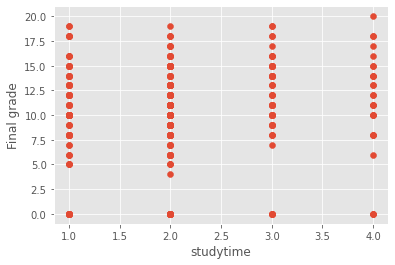

In [0]:
p = "studytime"
style.use("ggplot")
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final grade")
plt.show()